# Disaster Tweet Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
# test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# EDA

## General Info About Dataset

In [3]:
print(train_df.shape)
print(test_df.shape)

(7613, 5)
(3263, 4)


In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print('----- Train Dataset Info -----')
print(train_df.info())
print('----- Test Dataset Info -----')
print(test_df.info())

----- Train Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
----- Test Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


## Data Distribution

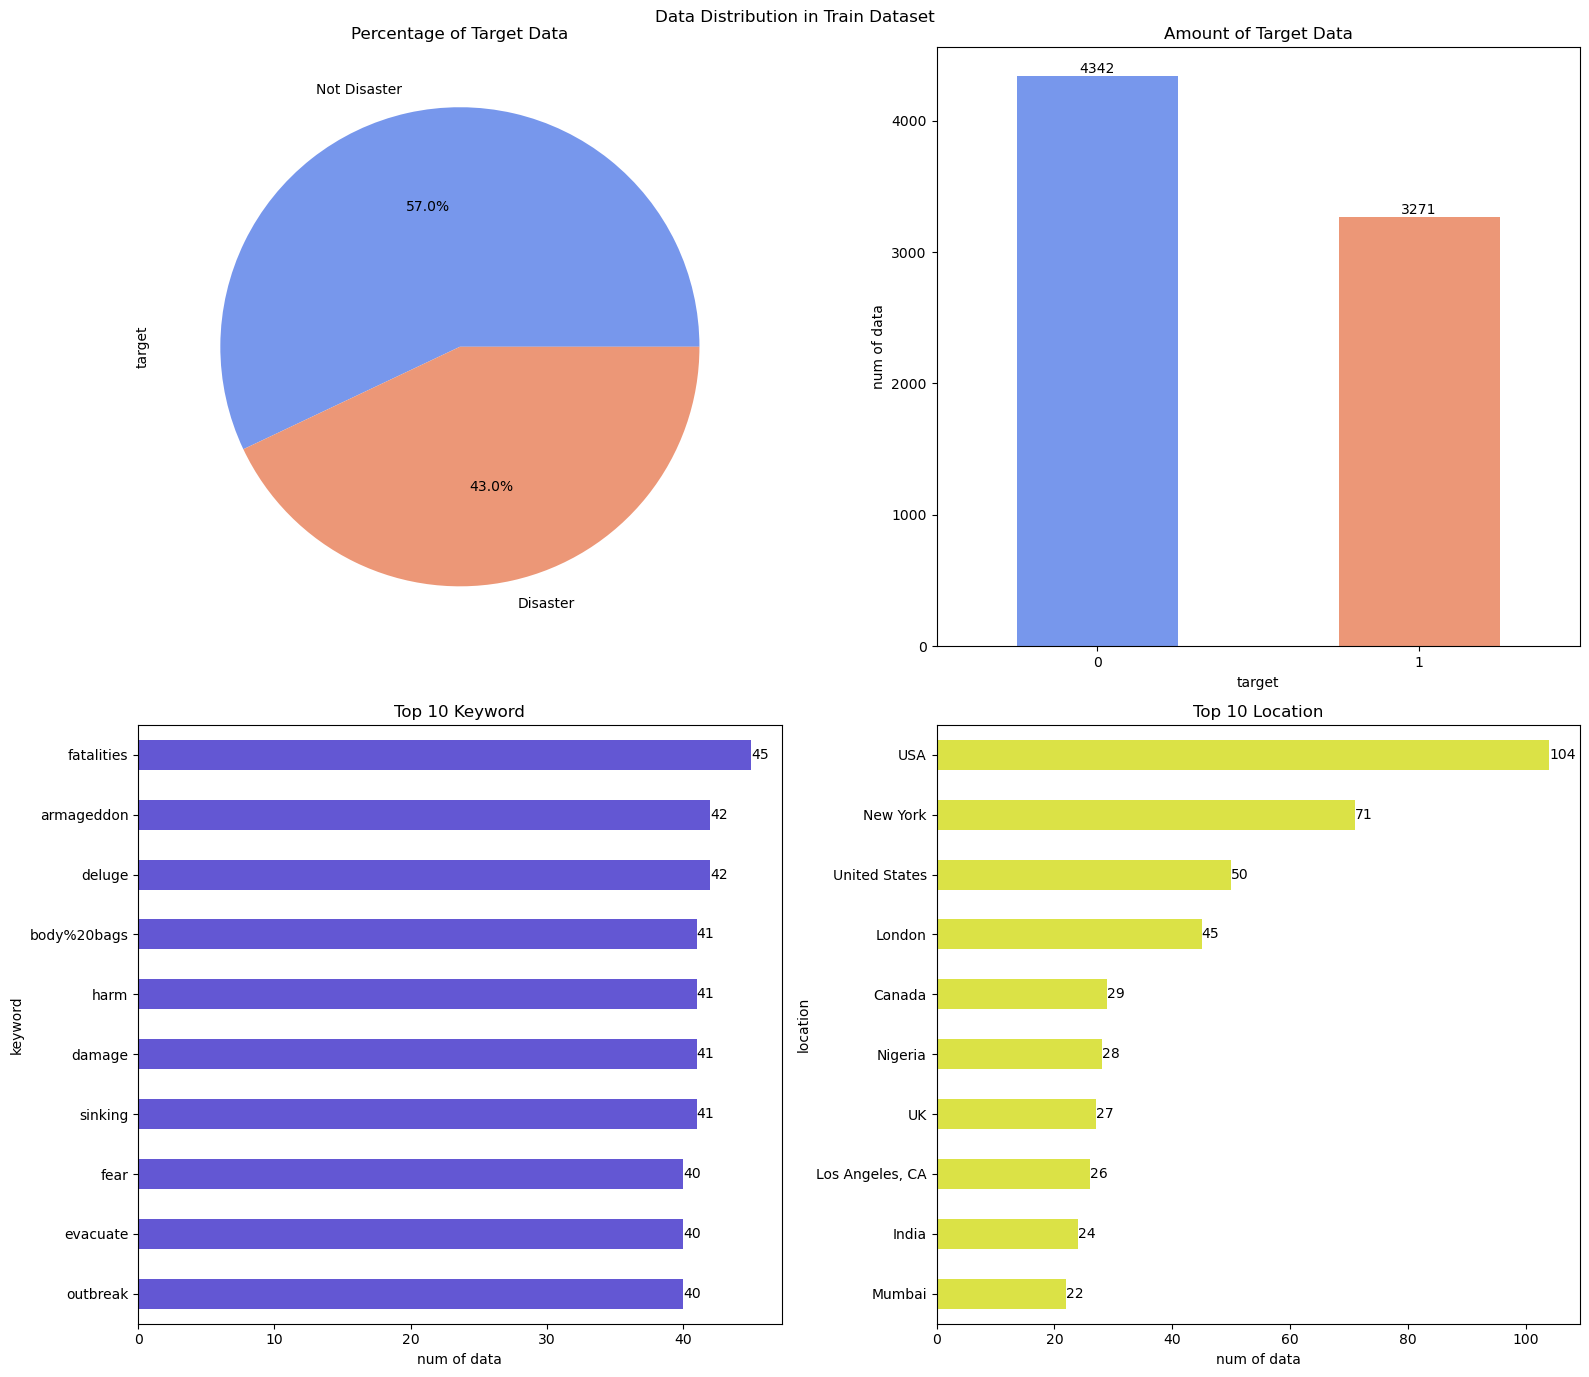

In [6]:
f, ax = plt.subplots(2, 2, figsize=(16,14))

# target distribution in train df with pie chart
train_df['target'].value_counts().plot(kind='pie', ax=ax[0,0], labels=['Not Disaster', 'Disaster'], autopct='%1.1f%%', colors=['#7797ec','#ec9777'])
ax[0,0].set_title('Percentage of Target Data')

# target distribution in train df with bar chart
train_df['target'].value_counts().plot(kind='bar', ax=ax[0,1], color=['#7797ec','#ec9777'], rot=0)
# annotate bar label
ax[0,1].bar_label(ax[0,1].containers[0], label_type='edge')
ax[0,1].set_title('Amount of Target Data')
ax[0,1].set_ylabel('num of data')
ax[0,1].set_xlabel('target')

# keyword distribution in train df with bar chart
train_df['keyword'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', ax=ax[1,0], color='#6357d3')
# annotate bar label
ax[1,0].bar_label(ax[1,0].containers[0], label_type='edge')
ax[1,0].set_title('Top 10 Keyword')
ax[1,0].set_ylabel('keyword')
ax[1,0].set_xlabel('num of data')


# location distribution in train df with bar chart
train_df['location'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh', ax=ax[1,1], color='#dbe246')
# annotate bar label
ax[1,1].bar_label(ax[1,1].containers[0], label_type='edge')
ax[1,1].set_title('Top 10 Location')
ax[1,1].set_ylabel('location')
ax[1,1].set_xlabel('num of data')

plt.suptitle('Data Distribution in Train Dataset')
plt.tight_layout()
plt.show()

## Wordcloud Preview

In [7]:
from wordcloud import WordCloud

In [8]:
def generate_wordcloud(text_list):
    tmp = ''
    # iterate through the csv file
    for val in text_list:
    # for val in tmp3:
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        tmp += " ".join(tokens)+" "
    
    wordcloud = WordCloud(max_words=50,width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(tmp)
    return wordcloud

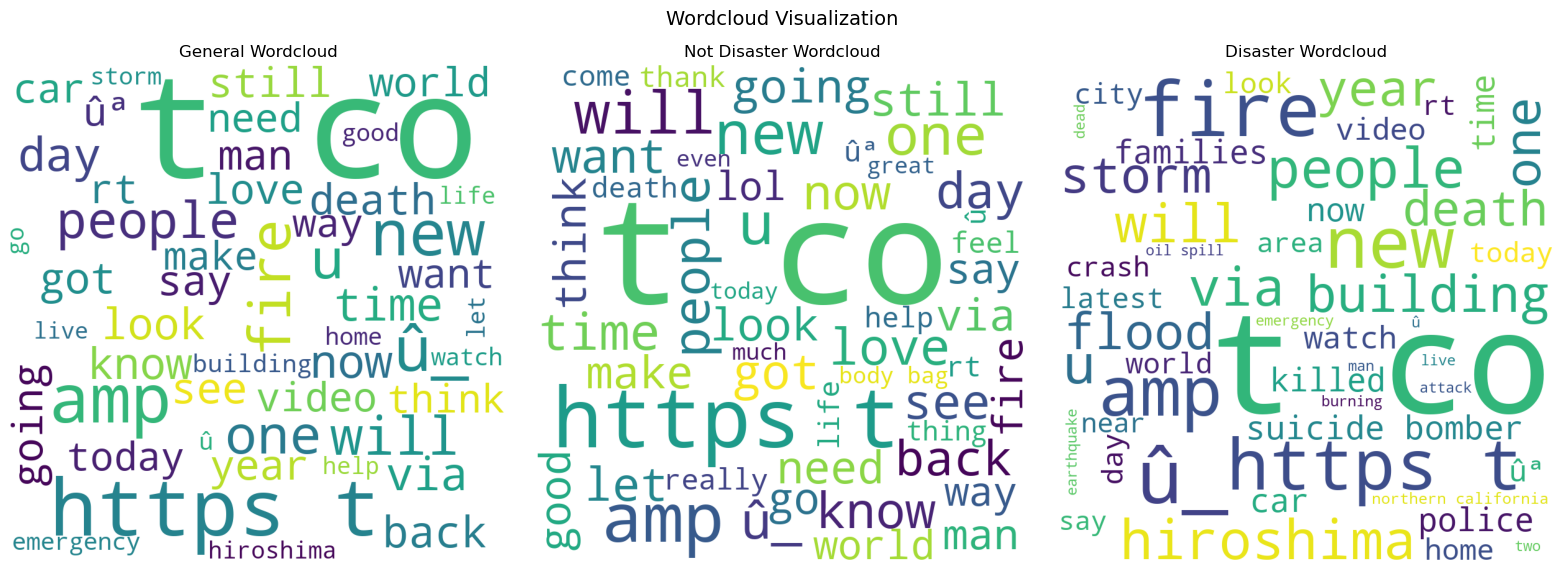

In [9]:
f, ax = plt.subplots(1,3, figsize=(16,8))
f.suptitle('Wordcloud Visualization', y=0.85, fontsize=14)

# general wordcloud
ax[0].set_title('General Wordcloud')
wordcloud = generate_wordcloud(train_df.text)
ax[0].imshow(wordcloud)
ax[0].axis('off')

# non-disaster wordcloud
ax[1].set_title('Not Disaster Wordcloud')
wordcloud = generate_wordcloud(train_df[train_df.target==0].text)
ax[1].imshow(wordcloud)
ax[1].axis('off')

# disaster wordcloud
ax[2].set_title('Disaster Wordcloud')
wordcloud = generate_wordcloud(train_df[train_df.target==1].text)
ax[2].imshow(wordcloud)
ax[2].axis('off')

plt.tight_layout(pad = 2)
plt.show()

# Preprocessing Data

## Handling Missing Data

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer = SimpleImputer(strategy='most_frequent')
# fill empty value in keyword and locaiton
train_df['keyword'] = imputer.fit_transform(train_df['keyword'].values.reshape(-1, 1)).flatten()
train_df['location'] = imputer.fit_transform(train_df['location'].values.reshape(-1, 1)).flatten()

test_df['keyword'] = imputer.fit_transform(test_df['keyword'].values.reshape(-1, 1)).flatten()
test_df['location'] = imputer.fit_transform(test_df['location'].values.reshape(-1, 1)).flatten()

print(train_df.isna().sum())
print(test_df.isna().sum())


id          0
keyword     0
location    0
text        0
target      0
dtype: int64
id          0
keyword     0
location    0
text        0
dtype: int64


## Cleaning Text

In [12]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text =  re.sub(r'[^a-z0-9 ]', ' ', text)
    text = re.sub(' +', ' ', text)

    return text.strip()

def stopword_removal(text, stopword_list):
    text = text.split()
    res = [word for word in text if word not in stopword_list]

    return ' '.join(res).strip()


In [14]:
# train_df.text.iloc[7459]

In [15]:
# tmp = clean_text(train_df.text.iloc[7459])
# stopword_removal(tmp, stopword_list)

In [16]:
custom_stopword = [
    'w',
    'rt',
    'amp',
    'u',
    'via',
    'im'
]

In [17]:
stopword_list = list(stopwords.words('english'))
stopword_list += custom_stopword

In [18]:
train_df['clean_text'] = train_df.text.apply(lambda x: clean_text(x))
train_df['clean_text'] = train_df.clean_text.apply(lambda x: stopword_removal(x, stopword_list))

test_df['clean_text'] = test_df.text.apply(lambda x: clean_text(x))
test_df['clean_text'] = test_df.clean_text.apply(lambda x: stopword_removal(x, stopword_list))

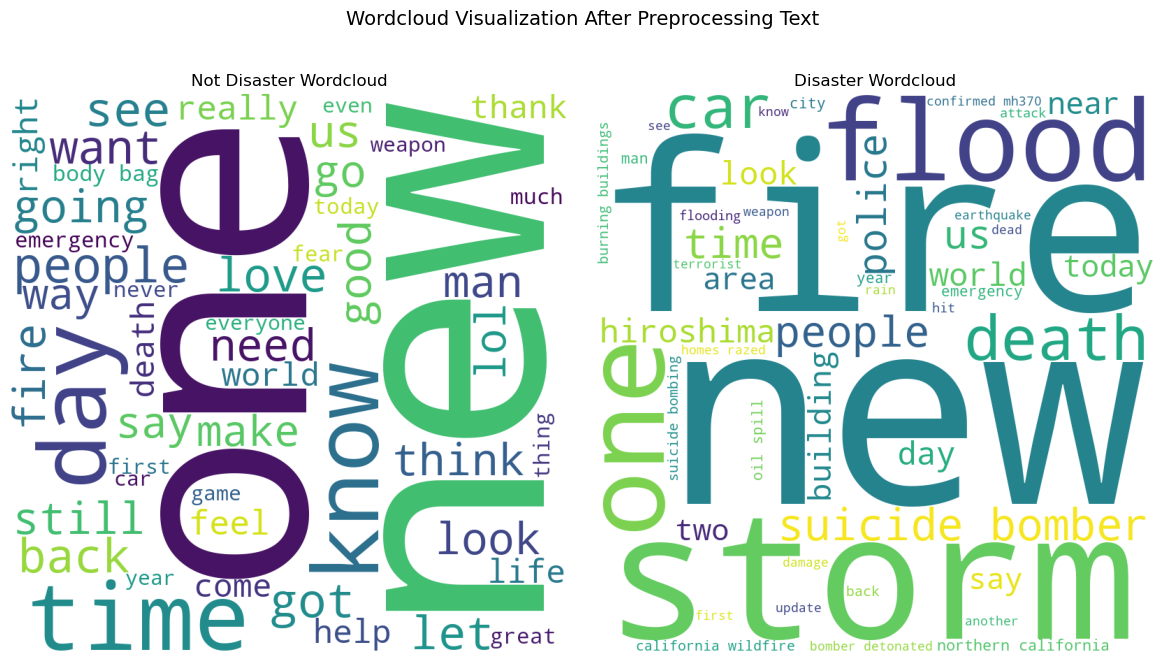

In [19]:
f, ax = plt.subplots(1,2, figsize=(12,10))
f.suptitle('Wordcloud Visualization After Preprocessing Text', y=0.84, fontsize=14)

# non-disaster wordcloud
ax[0].set_title('Not Disaster Wordcloud')
wordcloud = generate_wordcloud(train_df[train_df.target==0].clean_text)
ax[0].imshow(wordcloud)
ax[0].axis('off')

# disaster wordcloud
ax[1].set_title('Disaster Wordcloud')
wordcloud = generate_wordcloud(train_df[train_df.target==1].clean_text)
ax[1].imshow(wordcloud)
ax[1].axis('off')

plt.tight_layout(pad = 2)
plt.show()

## Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = train_df.clean_text
y = train_df.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, stratify=y, random_state=1)

X_test = test_df.clean_text

In [22]:
print(y_train.value_counts())
print(y_val.value_counts())

0    3473
1    2617
Name: target, dtype: int64
0    869
1    654
Name: target, dtype: int64


# Model Training

## Tokenize Text

In [23]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [24]:
vocab_words = 20000 # this means 20000 unique words can be taken 
tokenizer=Tokenizer(num_words=vocab_words,lower=True)
tokenizer.fit_on_texts(X_train)

In [25]:
# find max length of sentences across all parts of the dataset
max_len = max([len(i.split(' ')) for i in X_train])
print('max sentence length:',max_len)

max sentence length: 25


In [26]:
X_train_tokenize = tokenizer.texts_to_sequences(X_train)
X_train_tokenize_pad = pad_sequences(X_train_tokenize, maxlen = 25, padding = 'post')

# val data tokenize
X_val_tokenize = tokenizer.texts_to_sequences(X_val)
X_val_tokenize_pad = pad_sequences(X_val_tokenize, maxlen = 25, padding = 'post')

## Create Word Vector

In [27]:
from gensim.models import Word2Vec

In [28]:
def iter_data_from_df(df):
    res = []
    for line in df:
        res.append([word for word in line.split()])
    return res

In [29]:
X_train_tokenize_pad.shape[1]

25

In [30]:
# train word2vec model on the corpus
model_w2v = Word2Vec(iter_data_from_df(X_train),  # data for model to train on
                vector_size= X_train_tokenize_pad.shape[1],                            # embedding vector size
                min_count = 10,
                # epochs=15,
                sg=1,
                # negative=5,
                # sample=1e-5,
                seed=1)

In [31]:
print(model_w2v)

Word2Vec<vocab=1231, vector_size=25, alpha=0.025>


In [32]:
# print(model_w2v.wv.most_similar('fire'))

In [33]:
# model_w2v.build_vocab(iter_data_from_df(X_train), progress_per=1000)
# model_w2v.train(iter_data_from_df(X_train), total_examples=model_w2v.corpus_count, epochs=model_w2v.epochs)

### Create Weight Matrix

In [34]:
vector_size = model_w2v.vector_size
gensim_weight_matrix = np.zeros((vocab_words+1 ,vector_size))
gensim_weight_matrix.shape

(20001, 25)

In [35]:
def create_weight_matrix(model, second_model=False, dict_size=300):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.vector_size
  w_matrix = np.zeros((dict_size, vector_size))
  skipped_words = []

  for word, index in tokenizer.word_index.items():
    if index < dict_size:
      if word in model.key_to_index: 
        w_matrix[index] = model[word]
      else:
        if second_model:
          if word in second_model.key_to_index:
            w_matrix[index] = second_model[word]
          else:
            skipped_words.append(word)
        else:
          skipped_words.append(word)
 
  print(f'{len(skipped_words)} words were skipped. Some of them:')
  print(skipped_words[:50])
  return w_matrix, skipped_words


In [36]:
gensim_weight_matrix, skip_words = create_weight_matrix(model_w2v.wv, dict_size=tokenizer.num_words+1)

13330 words were skipped. Some of them:
['tried', 'seeing', 'feels', 'struggles', 'hwy', 'j', 'prevent', 'sleeping', 'beyond', 'talking', 'politics', 'express', 'sun', 'expect', 'usgs', 'hello', 'reading', 'total', 'pathogens', 'areas', 'ice', 'senso', 'cannot', 'list', 'matter', 'changes', 'insurer', 'gotta', '130', 'modified', '1980', 'tho', 'g', 'worth', 'wwii', 'trump', 'absolutely', 'municipal', 'foxnews', 'captures', 'company', 'return', 'cancer', 'england', 'related', 'roosevelt', 'happens', '1st', 'quite', 'preparedness']


## Create TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vect = TfidfVectorizer(ngram_range=(1,1), min_df=5)
vect.fit(X_train)

TfidfVectorizer(min_df=5)

In [39]:
X_train_v = vect.transform(X_train)
X_val_v = vect.transform(X_val)
X_test_v = vect.transform(X_test)

In [40]:
len(vect.vocabulary_)

2202

In [41]:
pd.DataFrame(X_train_v.toarray(), columns=vect.get_feature_names_out()).iloc[:, :].head()

,00,01,02,03,04,05,06,07,08,09,...,yo,york,young,youth,youtube,yrs,yyc,zionist,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### BERT Embedding

In [42]:
from sentence_transformers import SentenceTransformer

C:\Users\LENOVO\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')
X_train_e = model.encode(X_train.tolist())
X_val_e = model.encode(X_val.tolist())

In [44]:
X_train_e.shape

(6090, 384)

## Build Machine Learning Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [46]:
# nb_model = MultinomialNB()
# nb_model.fit(X_train_e, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train_e, y_train)

svm_model = SVC()
svm_model.fit(X_train_e, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_e, y_train)

RandomForestClassifier()

### Eval Model

In [47]:
from sklearn.metrics import f1_score

# nb_pred = nb_model.predict(X_val_v)
# print(f"Multinomial Naive Bayes F1 Score: {f1_score(y_val, nb_pred):.3f}")

lr_pred = lr_model.predict(X_val_e)
print(f"Logistic Regression F1 Score: {f1_score(y_val, lr_pred):.3f}")

svm_pred = svm_model.predict(X_val_e)
print(f"Support Vector Machine F1 Score: {f1_score(y_val, svm_pred):.3f}")

rf_pred = rf_model.predict(X_val_e)
print(f"Random Forest F1 Score: {f1_score(y_val, rf_pred):.3f}")

Logistic Regression F1 Score: 0.788
Support Vector Machine F1 Score: 0.794
Random Forest F1 Score: 0.756


## Build Neural Network Model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling1D, Conv1D, LSTM, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [49]:
EMBEDDING_DIM = X_train_e.shape[1] #gensim_weight_matrix.shape[1]
class_num = 1
num_words = tokenizer.num_words #len(tokenizer.word_index)

print(EMBEDDING_DIM)
print(num_words)
# print(len(tokenizer.word_index))

384
20000


In [50]:
X_train_tokenize_pad.shape

(6090, 25)

In [51]:

# model = Sequential()
# model.add(
#     Embedding(
#         input_dim = num_words+1,
#         output_dim = EMBEDDING_DIM,
#         input_length = EMBEDDING_DIM,
#         weights = [gensim_weight_matrix],
#         trainable = False
#     )
# )
# # model.add(Dropout(0.7))
# # model.add(Bidirectional(LSTM(100,return_sequences=True, dropout=.4)))
# # # model.add(Dropout(0.7))
# # model.add(Bidirectional(LSTM(100,return_sequences=True, dropout=.4)))
# # # model.add(Dropout(0.7))
# # model.add(Bidirectional(LSTM(100,return_sequences=False)))
# # model.add(Dense(64, activation = 'relu'))
# # model.add(Dropout(0.2))
# # model.add(Dense(class_num, activation = 'softmax'))

# # model.add(Dropout(0.2))
# # model.add(Bidirectional(LSTM(32,return_sequences=True)))
# # model.add(Dropout(0.2))
# # model.add(Bidirectional(LSTM(64,return_sequences=True)))
# # model.add(Dropout(0.2))
# # model.add(Bidirectional(LSTM(32,return_sequences=False)))
# # model.add(Dense(class_num, activation = 'softmax'))

# # model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(32,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(32,return_sequences=False)))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [52]:
EMBEDDING_DIM

384

In [53]:
model = Sequential()
#     model.add(Dense(128, input_dim=num_features, activation='relu', kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Reshape((EMBEDDING_DIM, 1), input_shape=(EMBEDDING_DIM,)))
model.add(Conv1D(activation='relu',
    filters=64, 
    kernel_size=4, 
    strides=1,
    padding='same'))
model.add(MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

# Define the learning rate decay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.95)

# optimizer = Adam(learning_rate=lr_schedule)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 384, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 384, 64)           320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 192, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 64)                786496    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [54]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
rlr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 3,                        
    min_lr = 0.001
)
mc = ModelCheckpoint('./model/model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [55]:
y_train.shape

(6090,)

In [56]:
with tf.device('/GPU:0'):   
    history_embedding = model.fit(X_train_e, y_train,
                                    epochs=20, validation_data=(X_val_e, y_val),
                                    batch_size=32, callbacks=[es, mc])

Epoch 1/20


191/191 [==============================] - ETA: 0s - loss: 0.8120 - accuracy: 0.5990
Epoch 1: val_accuracy improved from -inf to 0.81156, saving model to ./model\model.h5
191/191 [==============================] - 4s 14ms/step - loss: 0.8120 - accuracy: 0.5990 - val_loss: 0.6413 - val_accuracy: 0.8116
Epoch 2/20
191/191 [==============================] - ETA: 0s - loss: 0.6383 - accuracy: 0.7703
Epoch 2: val_accuracy improved from 0.81156 to 0.82141, saving model to ./model\model.h5
191/191 [==============================] - 2s 12ms/step - loss: 0.6383 - accuracy: 0.7703 - val_loss: 0.5486 - val_accuracy: 0.8214
Epoch 3/20
191/191 [==============================] - ETA: 0s - loss: 0.5764 - accuracy: 0.7898
Epoch 3: val_accuracy did not improve from 0.82141
191/191 [==============================] - 2s 12ms/step - loss: 0.5764 - accuracy: 0.7898 - val_loss: 0.5142 - val_accuracy: 0.8207
Epoch 4/20
191/191 [==============================] - ETA: 0s - loss: 0.5579 - accuracy: 0.7966
Epoch

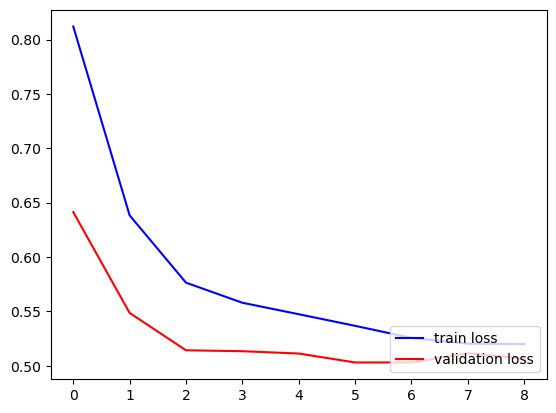

In [57]:
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='lower right')
plt.show()

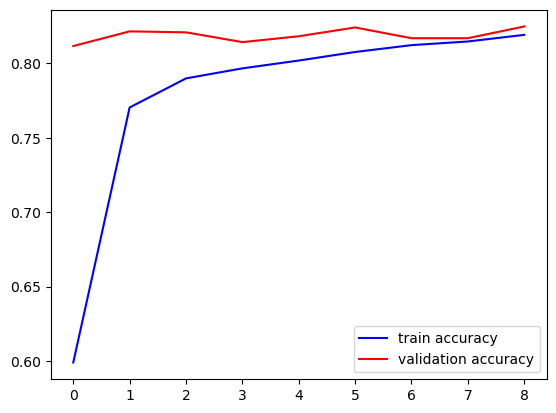

In [58]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()